<center>

<div style="text-align:center"><img src="_static/small_e_logo_cropped.png" width="40%" /></div>
<div style="text-align:center"><img src="_static/pangeo_simple_logo.png" width="175px" /></div>
</center>

Pangeo Tools
===========




A brief overview of the ecosystem of tools used by the [Pangeo Project](http://pangeo.io/).

In [42]:
import numpy as np
import xarray as xr

np.set_printoptions(precision=4, threshold=5)

xr.set_options(display_width=80)

### Pangeo is:

- a community promoting open, reproducible, and scalable science.
- an integrated ecosystem of open source software tools.
- a community platform for Big Data Geoscience.

### Where to find Pangeo:

- Online: http://pangeo.io/
- GitHub: https://github.com/pangeo-data/
- Discourse: https://discourse.pangeo.io/

<div style="text-align:center"><img src="_static/scientific_python_eco.png" width="100%" /></div>


## The Basics

NumPy / SciPy / Pandas/ Jupyter


### NumPy

NumPy is the fundamental package for scientific computing with Python. It contains among other things:

- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

In [8]:
import numpy as np

x = np.ones((4, 2))
x.sum(axis=1)

array([2., 2., 2., 2.])

### SciPy

SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python. It contains subpackages that cover:

- clustering
- FFTs
- interpolation
- linear algebra
- singal processing
- stats
- optimization

In [10]:
from scipy import spatial
x, y = np.mgrid[0:5, 2:8]
tree = spatial.KDTree(list(zip(x.ravel(), y.ravel())))
pts = np.array([[0, 0], [2.1, 2.9]])
tree.query(pts)

tree.query(pts[0])

ModuleNotFoundError: No module named 'scipy'

In [22]:
%matplotlib inline

### Pandas

Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. Pandas is well suited for:

- Tabular data types (see `Series` and `DataFrame` objects)
- Timeseries data manipulation like resampling
- Database-like operations like aligning, merging, joining, reshaping, and grouping

,tasmin_day_CESM1-BGC_rcp85,tasmax_day_CESM1-BGC_rcp85
time,,
2006-01-01 00:00:00+00:00,276.406952,282.237305
2006-01-02 00:00:00+00:00,273.133514,282.225494
2006-01-03 00:00:00+00:00,272.838989,284.240356
2006-01-04 00:00:00+00:00,279.459961,285.666504
2006-01-05 00:00:00+00:00,278.907623,285.405121


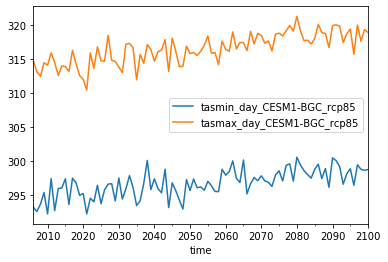

In [24]:
import pandas as pd

df = pd.read_csv('./data/chico_temperature.csv', index_col=0, parse_dates=True)
display(df.head())
df.resample('AS').max().plot()

## Jupyter

## Xarray

<!-- <div style="text-align:center"><img src="_static/dataset-diagram.png" width="50%" /></div> -->
<img src="_static/dataset-diagram.png" align="right" width=66% alt="Xarray Dataset">


Xarray is a Python library that provides data structures and tools for working with multidimensional labeled datasets and arrays. Xarray enables users to perform operations on complex datasets making it a powerful high-level tool for data analysis. 

- Inspired by Pandas and NetCDF
- Labeled N-Dimensional data structures (`DataArray` and `Dataset`)
- Toolkit for data manipulation and visualization
- Integrates with scientific Python ecosystem (Pandas/Matplotlib/Dask/etc)
- Backend support for a wide range of ND data formats (NetCDF, GRIB, Raster, Zarr)


#### xarray.Dataset

In [43]:
import xarray as xr
ds = xr.tutorial.load_dataset('air_temperature')
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.49 296.19 295.69
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

#### xarray.DataArray

In [44]:
da = ds['air']

da.isel(time=0, lat=5, lon=10)  # select using integer index
da.sel(time='2013-01-01T18:00:00', lat=62.5, lon=225.0)  # select based on label

<xarray.DataArray 'air' ()>
array(265.6, dtype=float32)
Coordinates:
    lat      float32 62.5
    lon      float32 225.0
    time     datetime64[ns] 2013-01-01T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [48]:
# resample data to monthly means
da_month = da.resample(time='MS').mean('time')

da_climo = da_month.groupby('time.month').mean('time')

# remove the monthly climotology
da_no_climo = da_month - da_climo
da_no_climo

<xarray.DataArray 'air' (time: 24, lat: 25, lon: 53, month: 12)>
array([[[[-1.8830e+00, -2.2104e+00, -6.5648e+00, ..., -1.7347e+01,
          -9.2780e+00, -3.5042e+00],
         [-1.7224e+00, -1.7421e+00, -6.0161e+00, ..., -1.6549e+01,
          -8.9813e+00, -3.3574e+00],
         [-1.5447e+00, -1.2780e+00, -5.5191e+00, ..., -1.5833e+01,
          -8.8267e+00, -3.2425e+00],
         ...,
         [-5.6949e-01,  6.3316e-01,  2.9770e-01, ..., -5.7018e+00,
          -4.6909e-01,  2.7198e+00],
         [-6.8140e-01,  4.0443e-01,  2.9169e-01, ..., -5.6635e+00,
          -5.2806e-01,  2.3827e+00],
         [-9.7075e-01,  2.3210e-01,  3.6635e-01, ..., -5.7403e+00,
          -4.6614e-01,  2.0477e+00]],

        [[-1.7842e+00, -7.2672e-01, -5.8986e+00, ..., -2.1949e+01,
          -1.2056e+01, -2.6601e+00],
         [-1.8847e+00, -7.3734e-01, -5.8436e+00, ..., -2.1907e+01,
          -1.1607e+01, -3.1377e+00],
         [-1.9828e+00, -7.4989e-01, -5.8459e+00, ..., -2.1987e+01,
          -1.1464e+0

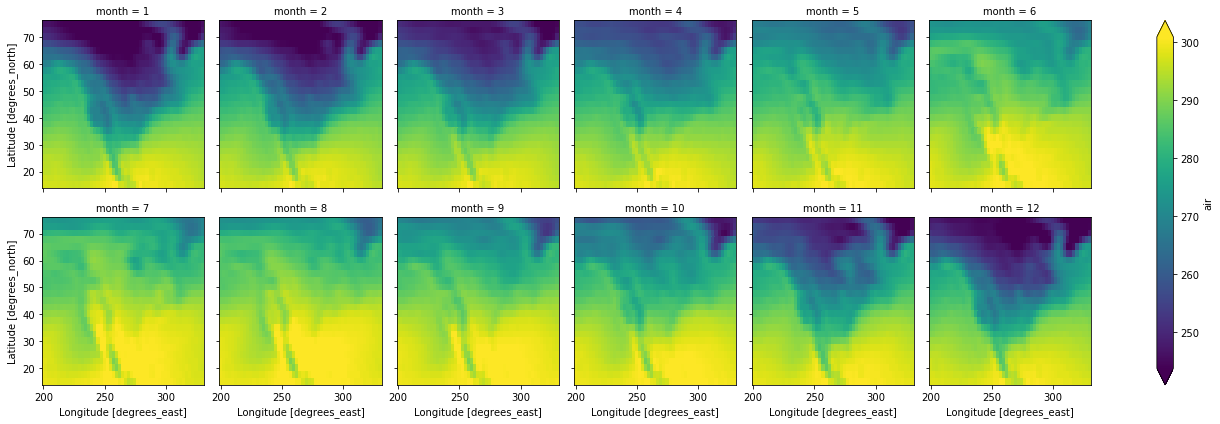

In [51]:
# integrated plotting
da_climo.plot(col='month', col_wrap=6, robust=True)

## Dask

<img src="https://dask.readthedocs.io/en/latest/_images/dask_horizontal.svg" align="right" width=50% alt="Dask Logo">

Dask is a flexible parallel computing library for analytic computing. Dask provides dynamic parallel task scheduling and high-level big-data collections like dask.array and dask.dataframe.

- Dask Array implements a subset of the NumPy ndarray interface using blocked algorithms, cutting up the large array into many small arrays.
- Tools like Xarray and Iris use Dask arrays under-the-hood
- Dask can be deployed on a local computer, HPC, or the Cloud

## Dask Arrays

A dask array looks and feels a lot like a numpy array. However, a dask array doesn't directly hold any data. Instead, it symbolically represents the computations needed to generate the data. Nothing is actually computed until the actual numerical values are needed. This mode of operation is called "lazy"; it allows one to build up complex, large calculations symbolically before turning them over the scheduler for execution.

In [52]:
# Numpy
import numpy as np
shape = (1000, 4000)
ones_np = np.ones(shape)
ones_np

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [53]:
# Dask
import dask.array as da
chunk_shape = (1000, 1000)
ones = da.ones(shape, chunks=chunk_shape)
ones

dask.array<ones, shape=(1000, 4000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

### Deploying Dask

The Dask Schedulers orchestrate the tasks in the Task Graphs so that they can be run in parallel. How they run in parallel, though, is determined by which Scheduler you choose.

There are 3 *local* schedulers:

- **Single-Thread Local**: For debugging, profiling, and diagnosing issues
- **Multi-threaded**: Using the Python built-in threading package (the default for all Dask operations except Bags)
- **Multi-process**: Using the Python built-in multiprocessing package (the default for Dask Bags)

and 1 distributed scheduler, which we will talk about later:

- **Distributed**: Using the dask.distributed module (which uses tornado for TCP communication). The distributed scheduler uses a Cluster to manage communication between the scheduler and the "workers". This is described in the next section.

### Distributed Clusters (http://distributed.dask.org/)¶
Dask can be deployed on distributed infrastructure, such as a an HPC system or a cloud computing system.

- LocalCluster - Creates a Cluster that can be executed locally. Each Cluster includes a Scheduler and Workers.
- Client - Connects to and drives computation on a distributed Cluster

#### Dask Jobqueue (http://jobqueue.dask.org/)
- PBSCluster
- SlurmCluster
- LSFCluster
- etc.

#### Dask Kubernetes (http://kubernetes.dask.org/)
KubeCluster

## Vizualization

## Data Catalogs